# Proyecto Modulo 2

+ Integrante1: Corrales Camacho Cuauhtémoc
+ Integrante2: Sánchez Covarrubias Marco Antonio
+ Integrante3: 

### *"Análisis de rendimientos de compañías automotrices y predicciones de precios para el año 2020"*

**Objetivo general:**
+ Elaborar un análisis de precios y rendimientos accionarios de corporaciones automovilísticas.

**Objetivos específicos:**
+ Investigar los valores accionarios del periodo 2018-2019 de empresas automotrices económicas. 
+ Calcular los rendimientos porcentuales de las compañías anteriores.
+ Predecir precios accionarios del próximo año para cada empresa correspondiente.

**Planteamiento del proyecto**

Durante el estudio de este modulo, se han visto en clase los siguientes temas: Simulación Montecarlo, Integración Montecarlo, Fractales Aleatorios y Probabilidad Precio Umbral. Para la elaboración de este proyecto, se eligió el último tópico, ya que todos los integrantes del equipo son estudiantes de finanzas. Se decidió poner en desarrollar el tema de Probabilidad Precio Umbral porque es el más relacionado al área de nuestra carrera. 

El proyecto conciste en un análisis considerablemente detallado acerca de los valores accionarios que las empresas automototrices Ford, Volkswagen, Honda y Nissan generaron desde el inicio del año 2018 hasta la actualidad. Con ellos se calcularan los rendimientos en un determinado periodo de tiempo mediante el uso de un sistema probabilístico.

Al final, con los resultados obtenidos, se calcularan matematicamente una lista de posibles precios accionarios futuros y se daran a conocer nuestras conclusiones finales.

**Modelo del problema**

In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Para importar los datos historícos se hará uso de una función que extraiga el cúmulo de datos del sitio web "Yahoo Finanzas". Dicha función requerirá los siguientes parámetros:
+ El nombre del conjunto de acciones (**names**).
+ La fecha de inicio de los datos (**start**).
+ La fecha de límite de los datos (**end**).

Al ejecutar dicha función se le agregará el operador "*.dropna*" para que las filas de valores que serán representados en una tabla de formato pandas no contengan celdas sin valores.

Más tarde, se procesaran los precios mediante una función logarítmica para calcular los rendimientos diarios.

Después se calculará la media y la desviación estandar de los rendimentos obtenidos y se clasificarán por compañía para definir una función que simule escenarios aleatorios de los próximos rendimientos en un intervalo determinado. Dicha función tendrá los siguientes parametros:
+ La media (**mu**).
+ La desviación estandar (**std**).
+ El ciclo en días (**ndays**).
+ El número de escenarios requeridos (**nscen**).
+ La fecha de inicio de la predicción (**fecha_inicio**).

In [2]:
#Se importa el historico
def get_close(names,start,end):
    close=web.DataReader(name=names,data_source='yahoo',start=start,end=end)
    return close['Adj Close']

In [3]:
#Instrumentos
nombres=['F','VOW3.DE','HMC','NSANY']
# Fechas de interés (inicio y fin): 2013-2017
fecha_inicio='2018-01-01'
fecha_fin='2019-7-5'
# Función DataReader
cierres=get_close(nombres,fecha_inicio,fecha_fin).dropna()
print("Esta es la tabla de datos con la cual se trabajará")
cierres

Esta es la tabla de datos con la cual se trabajará


Symbols,F,HMC,NSANY,VOW3.DE
Date,,,,
2018-01-02,11.226595,33.041203,18.506634,156.690155
2018-01-03,11.315272,33.338268,18.700565,162.118057
2018-01-04,11.510363,33.980312,18.682095,164.954941
2018-01-05,11.705453,34.133633,18.829853,169.456100
2018-01-08,11.661115,34.306122,18.876028,170.061310
2018-01-09,11.599042,34.037807,18.968376,170.439560
2018-01-10,11.554701,34.766090,19.014551,168.510483
2018-01-11,11.669983,34.584023,19.162310,168.132233
2018-01-12,11.732057,34.430698,19.162310,170.042404


**Solución del problema y sus respectivas gráficas**

Los datos de la anterior tabla éstan representados por la gráfica debajo.


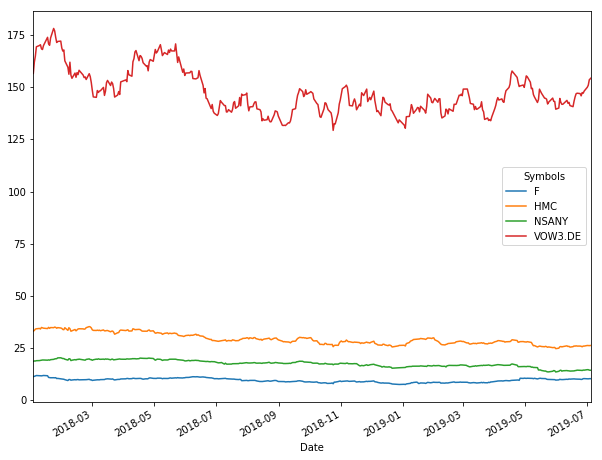

In [4]:
print("Los datos de la anterior tabla éstan representados por la gráfica debajo.")
cierres.plot(figsize=(10,8));

**En este caso, la simbología es la siguiente:**
+ *F* representa a Ford Motros Inc.
+ *HMC* representa a Honda Motors Corp.
+ *NSANY* representa a Nissan Motors Co.
+ *VOW3.DE* representa a Volkswagen AG.

In [5]:
#Simulacion de rendimientos diarios
# Calcular a diferencia logarítmica de precios y graficarlos
St=cierres
St1=cierres.shift()

Esta es la gráfica de los rendimientos diarios


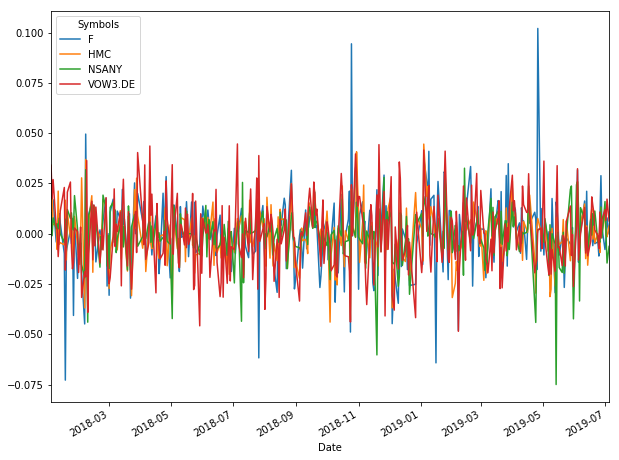

In [6]:
Ret=(np.log(St/St1)).dropna()
print("Esta es la gráfica de los rendimientos diarios")
Ret.plot(figsize=(10,8));

In [7]:
# Calculamos media 
muf=Ret.mean().F #Ford
muv=Ret.mean()['VOW3.DE'] #Volkswagen
muh=Ret.mean().HMC #Honda
mun=Ret.mean().NSANY #Nissan


print('El calculo de las medias es:')
muf,muv,muh,mun

El calculo de las medias es:


(-0.0002598856606974845,
 -3.639334657032583e-05,
 -0.000632855891273087,
 -0.0007159439147932965)

In [8]:
# Calculamos desviación estándar
stdf=Ret.std().F  #Ford
stdv=Ret.std()['VOW3.DE'] #Volkswagen
stdh=Ret.std().HMC #Honda
stdn=Ret.std().NSANY #Nissan
print('El calculo de la desviación estándar es:')
stdf,stdv,stdh,stdn

El calculo de la desviación estándar es:


(0.01757653794706786,
 0.01728273049722626,
 0.01293766233373254,
 0.01231562296875445)

In [9]:
#Se define una función para simular diversos escenarios de rendimientos. 
def ret_simu(mu,std,ndays,nscen,fecha_inicio):
    dias = pd.date_range(start=fecha_inicio,periods=ndays)
    f_norm = std*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(data=f_norm,index=dias)

In [10]:
ndays = 539   #Este es el número de días restantes del 2019 más el año 2020
nscen = 50
fecha_inicio = "2019-7-9"

sim_Ret_F = ret_simu(muf,stdf,ndays,nscen,fecha_inicio)

sim_Ret_V = ret_simu(muv,stdv,ndays,nscen,fecha_inicio)

sim_Ret_H = ret_simu(muh,stdh,ndays,nscen,fecha_inicio)

sim_Ret_N = ret_simu(mun,stdn,ndays,nscen,fecha_inicio)

In [11]:
print("Esta es la simulación de rendimientos de Ford Motors Inc")
sim_Ret_F

Esta es la simulación de rendimientos de Ford Motors Inc


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,-0.020682,0.017829,0.000609,0.009335,-0.006746,0.002034,-0.007799,0.002511,0.001540,-0.001117,...,0.029323,0.017624,0.021688,-0.009893,-0.006496,-0.005076,-0.005793,0.019893,0.016460,0.011035
2019-07-10,-0.017386,0.023810,0.026666,-0.031451,0.000009,-0.021112,0.006293,-0.002343,-0.010944,-0.006451,...,-0.017464,0.023102,0.006965,0.000346,0.017185,-0.011663,0.002232,-0.020662,0.023796,0.011406
2019-07-11,-0.012348,0.000471,0.009944,-0.012689,0.033041,-0.007483,0.006596,0.008641,-0.003670,-0.016683,...,-0.026155,0.011696,0.004306,-0.007690,-0.014560,-0.027252,-0.004621,0.013885,0.009691,-0.003118
2019-07-12,-0.009531,0.005854,0.010515,-0.001762,0.005069,-0.021955,-0.049467,0.013144,0.003880,0.010091,...,0.042727,0.005845,-0.020590,0.015794,-0.023819,0.012326,-0.009403,0.030513,0.014922,0.011076
2019-07-13,0.004049,-0.013655,0.010262,-0.033434,-0.001531,0.011755,-0.005223,0.000072,0.003723,-0.008103,...,-0.015250,-0.020515,0.006992,0.010438,0.005086,-0.016031,0.005598,-0.024673,0.018735,0.019987
2019-07-14,-0.036323,-0.011170,0.012348,0.008831,-0.050928,-0.013266,-0.005427,0.001414,0.025020,0.014616,...,0.010393,0.001885,0.007753,0.019694,0.003720,-0.003314,0.017910,0.000182,0.022067,-0.006142
2019-07-15,0.017462,0.001518,-0.005337,-0.014427,-0.018642,-0.028067,-0.028112,-0.022217,-0.010205,0.035834,...,0.011773,-0.017279,-0.014186,0.004534,0.015631,-0.012271,0.010724,-0.008505,-0.000954,0.021402
2019-07-16,-0.010390,-0.042611,0.014115,-0.037800,-0.031497,-0.015711,0.000042,0.012038,-0.003998,0.006262,...,0.000733,-0.029423,-0.011942,0.001862,0.014413,0.021201,-0.011679,-0.011504,0.003096,-0.000229
2019-07-17,-0.039126,-0.006254,-0.015028,0.011391,0.024075,-0.029582,0.012935,-0.001327,-0.008409,0.006541,...,-0.021545,0.000113,-0.011073,0.020176,0.004299,-0.003366,-0.000669,-0.032869,-0.030152,-0.021450
2019-07-18,0.010554,-0.012129,0.014261,0.014658,0.001961,0.015649,0.025948,-0.001378,-0.001727,-0.034442,...,0.009044,0.029072,-0.012492,0.016956,-0.017600,-0.004165,-0.002869,-0.017366,0.010733,-0.003640


In [12]:
print("Esta es la simulación de rendimientos de Volkswagen AG")
sim_Ret_V

Esta es la simulación de rendimientos de Volkswagen AG


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,0.008241,0.008802,0.039728,-0.013164,-0.003862,-0.027486,-0.002997,0.024461,0.015928,0.015824,...,0.003985,-0.007666,-0.000224,-0.019017,-0.013362,0.002598,-0.025241,-0.005568,-0.016427,-0.003597
2019-07-10,-0.011872,-0.012155,0.015526,0.021041,0.004219,-0.007225,-0.014533,0.038923,-0.024851,-0.001277,...,-0.035462,-0.011822,-0.005717,-0.018542,0.031992,0.038661,0.013952,-0.009176,-0.004632,-0.005265
2019-07-11,0.018139,-0.026814,-0.016321,0.014850,0.004249,0.010556,0.011609,-0.021459,-0.048988,0.008606,...,0.045178,-0.018376,-0.012021,0.008771,0.010029,-0.022617,-0.010498,-0.004365,0.011216,0.003716
2019-07-12,0.000054,0.002444,0.059182,0.015956,0.006906,-0.006970,-0.009723,0.020480,0.070496,-0.026228,...,0.031428,-0.023193,0.013421,-0.017514,-0.005926,0.006009,0.033836,0.000764,0.008369,0.032556
2019-07-13,-0.003756,-0.005038,-0.011769,-0.024909,-0.004100,0.035248,-0.020151,-0.016894,-0.006812,0.021516,...,0.016121,0.011818,0.021454,0.020114,0.025395,-0.015434,-0.022029,-0.013438,0.006444,0.012051
2019-07-14,0.015427,-0.013459,-0.037125,0.017581,-0.012924,0.014483,0.010319,0.020182,0.024663,-0.003444,...,-0.005447,0.010399,-0.007647,-0.009586,-0.016078,0.012251,-0.013531,0.020253,0.000016,0.024334
2019-07-15,0.001815,-0.011387,-0.001308,-0.005807,-0.025558,-0.003076,0.009498,0.023422,-0.003089,0.009644,...,0.001372,0.020849,-0.017610,-0.004778,0.022329,0.004419,0.016159,-0.000574,0.008564,-0.029719
2019-07-16,-0.002018,0.016686,-0.001004,0.005078,0.008027,-0.032238,0.000455,-0.013796,0.013117,-0.014905,...,-0.022321,0.004831,-0.003148,-0.002409,-0.002604,-0.018835,0.022226,-0.001000,-0.008783,-0.019321
2019-07-17,0.010622,-0.002854,0.014185,-0.005838,0.005755,-0.022523,0.005111,0.019320,-0.002218,-0.009617,...,0.009202,-0.010136,-0.008601,-0.025379,-0.006633,-0.029358,-0.000923,0.010771,-0.009087,-0.006641
2019-07-18,-0.009045,0.001758,0.014483,0.004901,-0.007516,-0.009213,-0.005707,0.017430,0.019130,0.006724,...,0.029892,-0.004715,0.000708,0.024537,-0.025219,-0.018227,-0.011618,-0.008688,-0.003166,0.011745


In [13]:
print("Esta es la simulación de rendimientos de Honda Motors Corp.")
sim_Ret_H

Esta es la simulación de rendimientos de Honda Motors Corp.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,-0.017934,0.026784,-0.001921,-0.008312,-0.015128,-0.003754,-0.009735,0.007617,0.026095,-0.009547,...,0.000775,0.007448,-0.039351,-0.009644,0.009577,0.010819,0.001696,-0.002293,-0.007461,-0.022008
2019-07-10,-0.035822,0.024428,-0.007135,0.001823,0.013977,0.002862,-0.007600,-0.020220,-0.002791,0.015734,...,-0.017980,-0.010574,0.018163,-0.003507,0.004532,-0.024511,0.003332,-0.013785,-0.000692,0.002470
2019-07-11,0.014129,-0.010866,0.001708,0.017740,-0.005372,0.004486,-0.020860,-0.011177,0.002174,0.021658,...,-0.023394,-0.009220,-0.006214,-0.002709,0.001683,0.007219,-0.006098,0.008999,-0.000368,0.003411
2019-07-12,-0.002015,-0.007444,-0.002376,-0.012615,0.001689,-0.032732,0.000894,0.011893,-0.011890,-0.001296,...,-0.007023,0.010874,-0.025538,0.021636,-0.010491,-0.011054,-0.011833,0.004007,-0.001907,-0.001298
2019-07-13,-0.008925,0.006242,-0.032680,-0.007489,0.013797,-0.004002,-0.005309,-0.002842,-0.004597,0.036793,...,-0.008284,0.015230,0.006561,0.007614,0.012129,0.004893,-0.001168,-0.006643,0.009508,0.003400
2019-07-14,-0.005589,0.011332,-0.011170,-0.010847,-0.001390,0.003494,0.025527,0.001340,-0.003671,0.013698,...,-0.009386,0.008987,-0.006589,-0.026612,0.003428,-0.015546,-0.023533,0.020077,-0.004557,0.012601
2019-07-15,0.018807,0.006507,0.009456,-0.001134,0.004441,0.006032,-0.009054,0.008330,-0.011942,-0.009498,...,-0.010315,-0.013160,0.005553,-0.012718,0.015612,-0.009265,0.000020,-0.003703,-0.020201,-0.008340
2019-07-16,-0.019456,0.008089,0.010436,0.005614,0.007481,-0.014183,-0.020074,0.013296,-0.006663,0.010003,...,0.011982,-0.039917,-0.005282,-0.010200,-0.002539,0.004449,-0.005486,0.003916,-0.007518,-0.041789
2019-07-17,0.015031,0.011560,0.011068,-0.004597,0.001563,0.025139,0.006308,0.003724,0.024271,0.005938,...,-0.009461,0.003377,-0.017800,-0.013372,-0.027480,-0.019087,-0.002604,0.001997,-0.002325,-0.003733
2019-07-18,-0.011937,0.002221,0.005919,0.023041,0.015001,0.017726,0.008084,0.011254,-0.007970,-0.003710,...,0.002713,-0.014884,0.003931,-0.011525,-0.006721,-0.016019,-0.031717,0.002528,-0.017099,0.008685


In [14]:
print("Esta es la simulación de rendimientos de Nissan Motors Co.")
sim_Ret_N

Esta es la simulación de rendimientos de Nissan Motors Co.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,0.001110,0.006780,-0.003657,-0.005563,0.022060,-0.001214,0.006673,-0.009095,-0.015819,-0.008165,...,0.003499,0.002050,0.002628,-0.013875,0.011602,0.010885,-0.014091,-0.002938,-0.019863,-0.004077
2019-07-10,-0.001826,-0.012835,-0.034509,-0.003360,-0.012950,-0.013372,-0.016727,-0.018876,-0.011530,-0.007986,...,-0.016205,0.012303,-0.000576,0.002326,0.002970,0.000841,-0.007040,0.020804,0.017886,-0.018395
2019-07-11,0.006284,0.013242,-0.027229,0.001494,0.024748,0.017100,0.035897,-0.002638,-0.009791,0.005799,...,0.030311,0.001904,-0.024269,-0.011448,0.011016,-0.002184,-0.001817,0.003108,-0.011435,0.001637
2019-07-12,-0.000284,-0.027686,0.018308,-0.009508,0.008973,0.018291,0.013935,0.003411,-0.013290,-0.017961,...,0.000799,-0.001736,-0.005721,-0.000281,0.003401,-0.007801,0.004560,-0.000337,0.021181,0.001485
2019-07-13,0.009346,-0.004072,-0.003706,0.012593,-0.004716,-0.007416,-0.008685,0.024487,-0.013211,-0.006883,...,0.001967,-0.000848,-0.002165,-0.014024,0.003315,0.008037,-0.007662,0.007138,-0.004168,-0.010311
2019-07-14,0.006312,0.015367,-0.013119,0.002093,-0.010215,-0.012443,-0.014706,-0.002231,0.002974,-0.005510,...,-0.006704,-0.003234,0.006450,0.011827,-0.019188,0.015800,-0.005196,0.003020,-0.001358,-0.001468
2019-07-15,-0.021976,0.003465,0.000868,-0.009005,-0.002260,0.012847,-0.010024,0.012002,-0.001420,0.005822,...,-0.008337,-0.013708,-0.008317,0.016716,-0.001776,-0.000290,-0.018084,0.006685,0.000072,0.001938
2019-07-16,-0.006349,-0.022967,-0.021112,-0.001553,-0.017235,-0.000519,-0.010908,-0.000403,-0.007093,-0.010979,...,-0.001048,0.007029,0.005609,0.023028,0.012186,0.001667,-0.012481,-0.006029,-0.015123,0.007818
2019-07-17,-0.013075,0.001938,0.000600,0.006112,-0.001314,0.025348,0.004067,-0.010974,-0.000640,0.002974,...,0.011308,-0.003568,-0.003697,-0.008762,0.004082,-0.004679,-0.002822,0.017757,-0.016134,0.000489
2019-07-18,-0.014043,0.013941,0.023910,0.020399,0.004637,-0.005958,-0.010882,-0.008267,-0.012127,-0.000596,...,0.003284,0.013044,-0.010903,-0.010593,0.012975,0.032593,-0.013254,-0.009508,-0.026877,0.009464


In [21]:
#Proyecciones de precios de cierre
precios_simulador_F=cierres.iloc[-1].F*((sim_Ret_F+1).cumprod())
print("Esta es la proyección de precios de cierre de Ford Motors Inc")
precios_simulador_F

Esta es la proyección de precios de cierre de Ford Motors Inc


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,9.989044,10.381851,10.206212,10.295215,10.131189,10.220742,10.120454,10.225612,10.215705,10.188603,...,10.499090,10.379765,10.421222,10.099090,10.133744,10.148220,10.140912,10.402906,10.367897,10.312559
2019-07-10,9.815379,10.629040,10.478368,9.971418,10.131277,10.004960,10.184141,10.201658,10.103902,10.122878,...,10.315736,10.619562,10.493808,10.102586,10.307892,10.029857,10.163544,10.187962,10.614613,10.430184
2019-07-11,9.694176,10.634045,10.582567,9.844891,10.466025,9.930096,10.251318,10.289815,10.066818,9.953998,...,10.045927,10.743764,10.538990,10.024893,10.157810,9.756525,10.116579,10.329420,10.717480,10.397664
2019-07-12,9.601782,10.696293,10.693840,9.827545,10.519077,9.712077,9.744214,10.425069,10.105879,10.054448,...,10.475159,10.806562,10.321992,10.183225,9.915860,9.876785,10.021449,10.644597,10.877406,10.512828
2019-07-13,9.640659,10.550230,10.803585,9.498970,10.502969,9.826244,9.693324,10.425816,10.143505,9.972978,...,10.315408,10.584862,10.394164,10.289518,9.966295,9.718453,10.077545,10.381967,11.081192,10.722946
2019-07-14,9.290484,10.432386,10.936991,9.582853,9.968073,9.695891,9.640717,10.440561,10.397295,10.118744,...,10.422618,10.604814,10.474750,10.492157,10.003365,9.686244,10.258036,10.383861,11.325720,10.657087
2019-07-15,9.452711,10.448222,10.878624,9.444602,9.782249,9.423754,9.369698,10.208604,10.291189,10.481337,...,10.545326,10.421577,10.326151,10.539731,10.159730,9.567386,10.368039,10.295546,11.314913,10.885171
2019-07-16,9.354498,10.003016,11.032173,9.087595,9.474139,9.275699,9.370087,10.331497,10.250049,10.546971,...,10.553054,10.114943,10.202841,10.559355,10.306161,9.770227,10.246952,10.177105,11.349944,10.882683
2019-07-17,8.988495,9.940456,10.866380,9.191116,9.702232,9.001308,9.491286,10.317790,10.163852,10.615957,...,10.325684,10.116090,10.089861,10.772403,10.350467,9.737337,10.240096,9.842593,11.007721,10.649245
2019-07-18,9.083355,9.819890,11.021346,9.325837,9.721255,9.142166,9.737566,10.303572,10.146296,10.250319,...,10.419073,10.410180,9.963818,10.955062,10.168296,9.696783,10.210719,9.671667,11.125864,10.610486


In [22]:
precios_simulador_V=cierres.iloc[-1]['VOW3.DE']*((sim_Ret_V+1).cumprod())
print("Esta es la proyección de precios de cierre de Volkswagen AG")
precios_simulador_V

Esta es la proyección de precios de cierre de Volkswagen AG


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,155.874130,155.960786,160.741933,152.564774,154.002952,150.350747,154.136623,158.381628,157.062503,157.046360,...,155.216016,153.414769,154.565450,151.659917,152.534164,155.001600,150.697793,153.739128,152.060414,154.043921
2019-07-10,154.023598,154.065152,163.237605,155.774932,154.652677,149.264426,151.896484,164.546321,153.159358,156.845749,...,149.711816,151.601168,153.681765,148.847814,157.413984,160.994134,152.800354,152.328387,151.356085,153.232842
2019-07-11,156.817453,149.933975,160.573356,158.088149,155.309837,150.840027,153.659920,161.015400,145.656361,158.195509,...,156.475424,148.815276,151.834354,150.153368,158.992706,157.352988,151.196321,151.663543,153.053660,153.802202
2019-07-12,156.825945,150.300403,170.076473,160.610540,156.382402,149.788604,152.165948,164.312942,155.924548,154.046405,...,161.393175,145.363869,153.872136,147.523619,158.050498,158.298543,156.312194,151.779363,154.334550,158.809447
2019-07-13,156.236929,149.543156,168.074928,156.609899,155.741200,155.068282,149.099578,161.537108,154.862383,157.360887,...,163.994958,147.081779,157.173234,150.490911,162.064244,155.855331,152.868830,149.739769,155.329158,160.723259
2019-07-14,158.647141,147.530395,161.835146,159.363241,153.728339,157.314167,150.638153,164.797176,158.681727,156.818910,...,163.101740,148.611245,155.971259,149.048305,159.458618,157.764662,150.800425,152.772453,155.331566,164.634312
2019-07-15,158.935100,145.850499,161.623500,158.437761,149.799406,156.830344,152.068924,168.657107,158.191551,158.331209,...,163.325496,151.709646,153.224602,148.336172,163.019124,158.461799,153.237257,152.684801,156.661794,159.741481
2019-07-16,158.614306,148.284216,161.461156,159.242331,151.001863,151.774456,152.138083,166.330298,160.266482,155.971267,...,159.679877,152.442573,152.742264,147.978807,162.594569,155.477237,156.643083,152.532107,155.285860,156.655193
2019-07-17,160.299150,147.860951,163.751560,158.312745,151.870921,148.356112,152.915631,169.543716,159.911066,154.471364,...,161.149210,150.897364,151.428507,144.223246,161.516068,150.912672,156.498489,154.174975,153.874732,155.614768
2019-07-18,158.849278,148.120935,166.123224,159.088566,150.729436,146.989236,152.042948,172.498849,162.970169,155.510056,...,165.966316,150.185859,151.535666,147.762106,157.442792,148.161994,154.680323,152.835502,153.387571,157.442533


In [23]:
precios_simulador_H=cierres.iloc[-1].HMC*((sim_Ret_H+1).cumprod())
print("Esta es la proyección de precios de cierre de Honda Motors Corp.")
precios_simulador_H

Esta es la proyección de precios de cierre de Honda Motors Corp.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,25.690838,26.860671,26.109754,25.942549,25.764242,26.061790,25.905331,26.359271,26.842643,25.910237,...,26.180271,26.354829,25.130589,25.907714,26.410533,26.443037,26.204358,26.100012,25.964832,25.584268
2019-07-10,24.770536,27.516820,25.923456,25.989850,26.124349,26.136377,25.708449,25.826281,26.767722,26.317912,...,25.709543,26.076148,25.587024,25.816856,26.530217,25.794880,26.291684,25.740235,25.946873,25.647456
2019-07-11,25.120512,27.217834,25.967742,26.450900,25.984005,26.253616,25.172162,25.537630,26.825911,26.887899,...,25.108103,25.835723,25.428024,25.746906,26.574863,25.981104,26.131350,25.971860,25.937333,25.734939
2019-07-12,25.069886,27.015213,25.906047,26.117210,26.027898,25.394276,25.194665,25.841342,26.506964,26.853050,...,24.931761,26.116651,24.778652,26.303964,26.296069,25.693902,25.822134,26.075939,25.887884,25.701531
2019-07-13,24.846140,27.183833,25.059427,25.921614,26.387001,25.292660,25.060906,25.767897,26.385123,27.841052,...,24.725235,26.514412,24.941225,26.504245,26.615016,25.819615,25.791977,25.902727,26.134013,25.788922
2019-07-14,24.707282,27.491873,24.779517,25.640453,26.350324,25.381027,25.700647,25.802427,26.288269,28.222429,...,24.493160,26.752695,24.776886,25.798906,26.706263,25.418231,25.185016,26.422788,26.014926,26.113898
2019-07-15,25.171949,27.670755,25.013842,25.611377,26.467357,25.534136,25.467953,26.017356,25.974340,27.954364,...,24.240504,26.400621,24.914484,25.470791,27.123188,25.182741,25.185514,26.324954,25.489403,25.896110
2019-07-16,24.682205,27.894590,25.274877,25.755162,26.665348,25.171992,24.956722,26.363282,25.801284,28.233982,...,24.530965,25.346783,24.782879,25.210998,27.054314,25.294774,25.047351,26.428045,25.297785,24.813940
2019-07-17,25.053213,28.217038,25.554628,25.636761,26.707013,25.804781,25.114161,26.461452,26.427498,28.401632,...,24.298878,25.432375,24.341733,24.873877,26.310851,24.811981,24.982118,26.480815,25.238963,24.721316
2019-07-18,24.754151,28.279703,25.705885,26.227467,27.107638,26.262193,25.317188,26.759248,26.216869,28.296270,...,24.364805,25.053827,24.437412,24.587212,26.134016,24.414507,24.189756,26.547765,24.807406,24.936021


In [24]:
precios_simulador_N=cierres.iloc[-1].NSANY*((sim_Ret_N+1).cumprod())
print("Esta es la proyección de precios de cierre de Nissan Motors Co.")
precios_simulador_N

Esta es la proyección de precios de cierre de Nissan Motors Co.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,14.225771,14.306344,14.158032,14.130943,14.523468,14.192747,14.304826,14.080754,13.985216,14.093973,...,14.259717,14.239131,14.247341,14.012835,14.374865,14.364678,14.009772,14.168250,13.927744,14.152060
2019-07-10,14.199793,14.122728,13.669460,14.083470,14.335384,14.002966,14.065556,13.814959,13.823973,13.981417,...,14.028635,14.414321,14.239132,14.045425,14.417558,14.376765,13.911148,14.463012,14.176858,13.891732
2019-07-11,14.289023,14.309748,13.297248,14.104517,14.690154,14.242420,14.570471,13.778519,13.688623,14.062496,...,14.453851,14.441771,13.893556,13.884631,14.576380,14.345369,13.885874,14.507958,14.014744,13.914472
2019-07-12,14.284964,13.913573,13.540695,13.970415,14.821964,14.502924,14.773514,13.825513,13.506702,13.809923,...,14.465402,14.416700,13.814071,13.880731,14.625954,14.233465,13.949192,14.503072,14.311594,13.935129
2019-07-13,14.418475,13.856913,13.490518,14.146342,14.752064,14.395375,14.645209,14.164058,13.328267,13.714875,...,14.493849,14.404476,13.784161,13.686067,14.674445,14.347854,13.842313,14.606591,14.251948,13.791446
2019-07-14,14.509490,14.069856,13.313541,14.175951,14.601374,14.216259,14.429841,14.132462,13.367908,13.639306,...,14.396683,14.357896,13.873073,13.847934,14.392868,14.574554,13.770392,14.650698,14.232592,13.771196
2019-07-15,14.190629,14.118610,13.325101,14.048301,14.568372,14.398901,14.285190,14.302086,13.348921,13.718708,...,14.276651,14.161080,13.757690,14.079415,14.367300,14.570332,13.521366,14.748639,14.233615,13.797885
2019-07-16,14.100530,13.794341,13.043779,14.026478,14.317292,14.391431,14.129366,14.296326,13.254243,13.568095,...,14.261692,14.260624,13.834861,14.403643,14.542383,14.594616,13.352605,14.659725,14.018359,13.905753
2019-07-17,13.916162,13.821074,13.051606,14.112207,14.298486,14.756228,14.186825,14.139433,13.245760,13.608451,...,14.422963,14.209740,13.783712,14.277445,14.601741,14.526331,13.314929,14.920036,13.792179,13.912560
2019-07-18,13.720744,14.013756,13.363669,14.400087,14.364794,14.668307,14.032443,14.022543,13.085129,13.600339,...,14.470333,14.395088,13.633425,14.126202,14.791200,14.999792,13.138448,14.778182,13.421484,14.044234


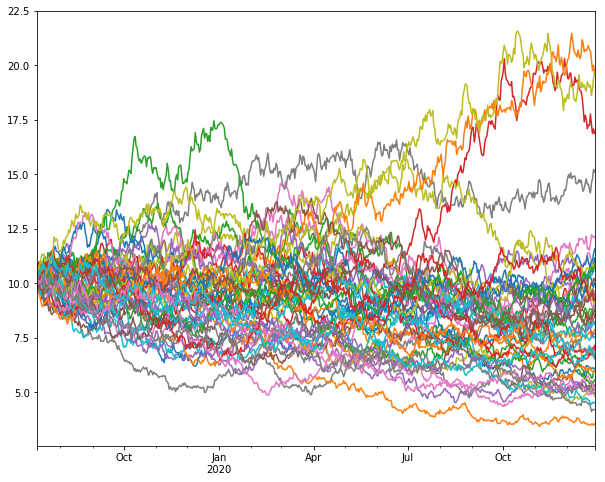

In [29]:
#Graficar
precios_simulador_F.plot(figsize=(10,8),legend=False);

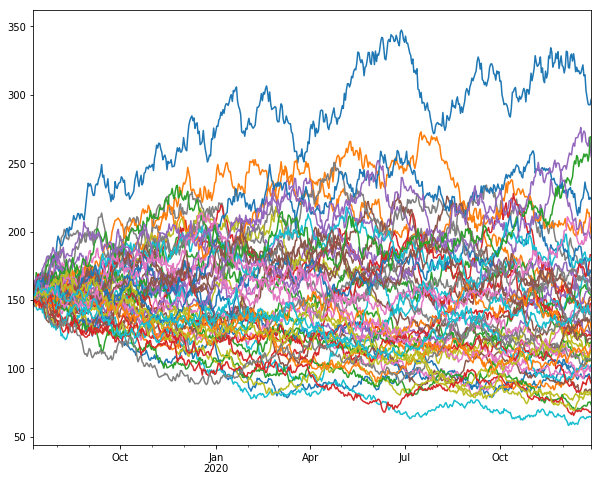

In [26]:
precios_simulador_V.plot(figsize=(10,8),legend=False);

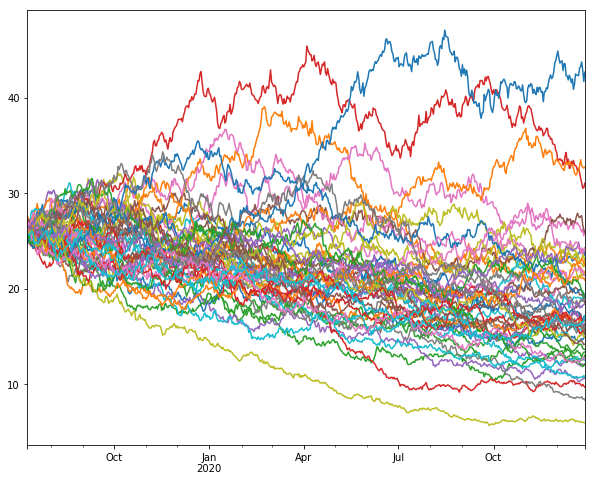

In [27]:
precios_simulador_H.plot(figsize=(10,8),legend=False);

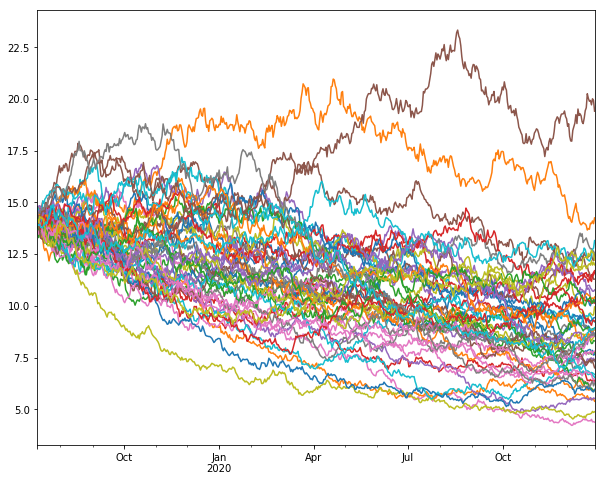

In [28]:
precios_simulador_N.plot(figsize=(10,8),legend=False);

**PROBABILIDAD PRECIO UMBRAL**

**Analísis de los resultados y conclusiones**

**Referencias**